# Chapter 1: Vectors and Vector Spaces

In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_iris()
X, y = data["data"], data["target"]
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
X.shape

(150, 4)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Plot the distribution of the features of the Iris dataset:

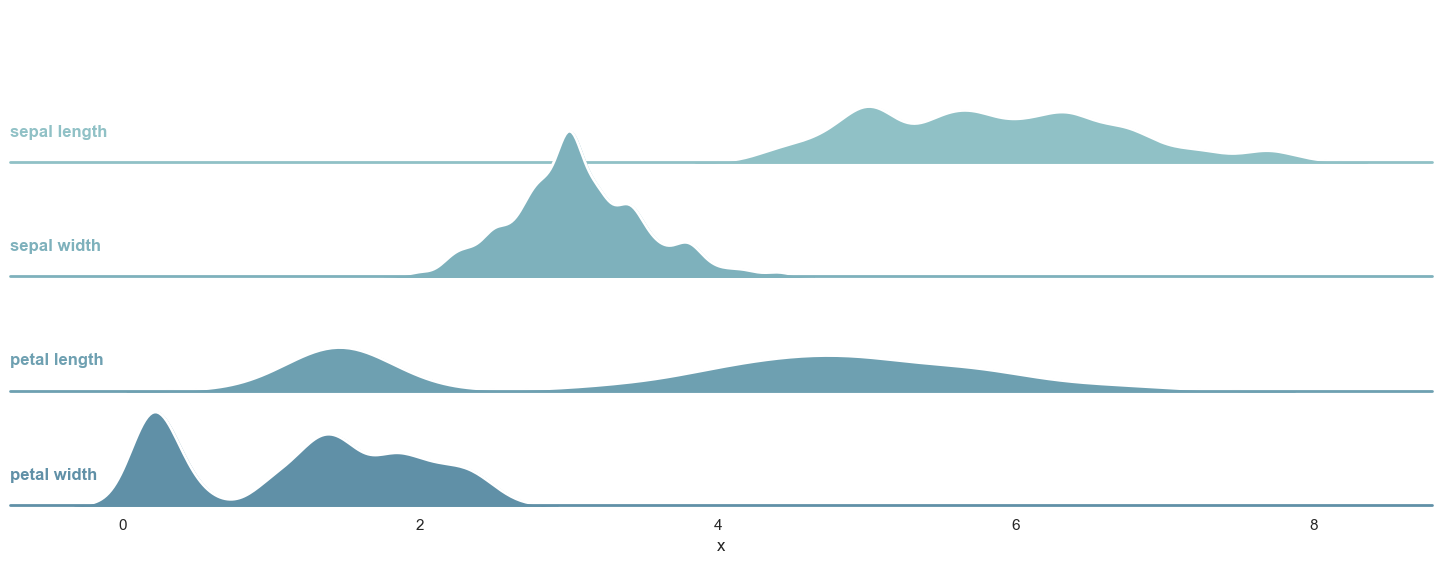

In [5]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data:
x = X.ravel()				# Flatten the array and return a view of the original array
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, len(X))
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities:
g.map(sns.kdeplot, "x",bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line:
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Label each plot:
g.map(
  lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=plt.gca().transAxes),
  "x"
)

# Adjust subplots and aesthetics:
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

Scale and plot the features of the dataset:

In [6]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

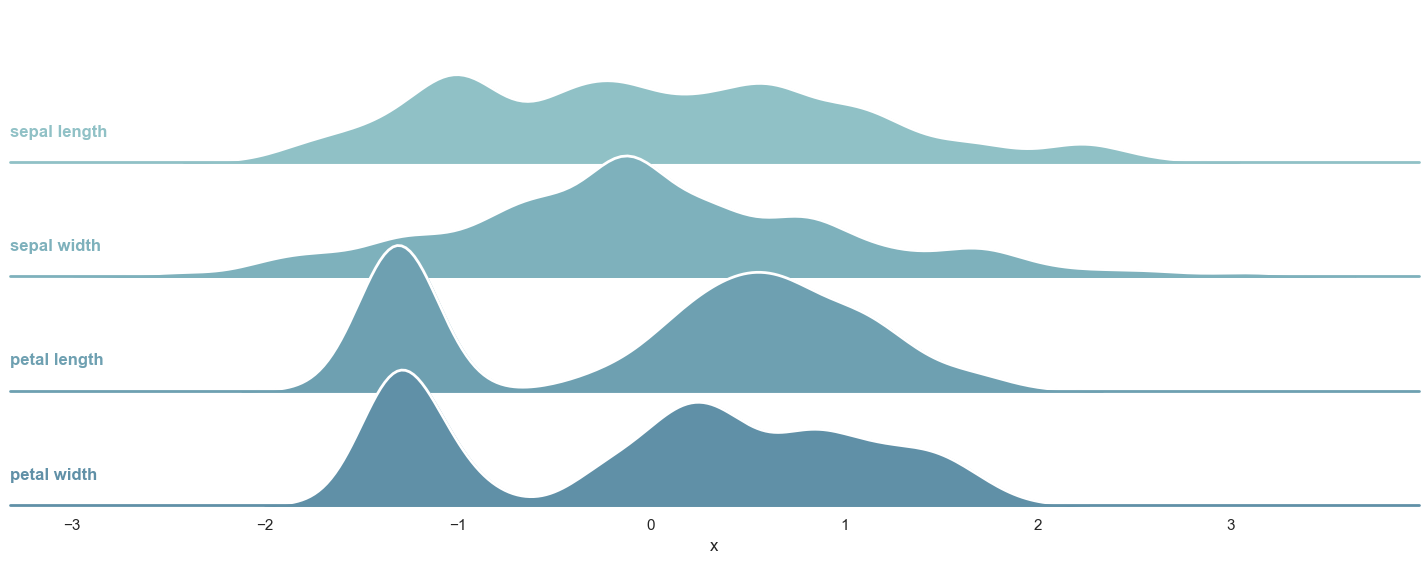

In [7]:
# Create the data:
x = X_scaled.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, X_scaled.shape[0])
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
grid = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities:
grid.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
grid.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line:
grid.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Add labels to each plot:
grid.map(lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=plt.gca().transAxes), "x")

# Adjust subplots and aesthetics:
grid.figure.subplots_adjust(hspace=-.25)
grid.set_titles("")
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.show()

## 1.3 Vectors in practice

### 1.3.1 Tuples

In [8]:
v_tuple = (1, 3.5, -2.71, "a string", 42)
v_tuple

(1, 3.5, -2.71, 'a string', 42)

In [9]:
type(v_tuple)

tuple

In [10]:
v_tuple[0]

1

In [11]:
len(v_tuple)

5

In [12]:
v_tuple[1:4]

(3.5, -2.71, 'a string')

In [13]:
v_tuple[0] = 2

TypeError: 'tuple' object does not support item assignment

### 1.3.2 Lists

In [ ]:
v_list = [1, 3.5, -2.71, "qwerty"]
type(v_list)

list

In [ ]:
v_list[0] = "this is a string"
v_list

['this is a string', 3.5, -2.71, 'qwerty']

In [ ]:
v_list_addr = id(v_list)
v_list_addr

13132185472

In [ ]:
v_list.append([42])
v_list

['this is a string', 3.5, -2.71, 'qwerty', [42]]

In [ ]:
# Adding elements doesn't create any new objects:
id(v_list) == v_list_addr

True

In [ ]:
v_list.pop(1)
v_list

['this is a string', -2.71, 'qwerty', [42]]

In [ ]:
# Removing elements still doesn't create any new objects:
id(v_list) == v_list_addr

True

In [ ]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [ ]:
3 * [1, 2, 3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

### 1.3.3 NumPy arrays

In [ ]:
l = [2 ** 142 + 1, "a string"]
l.append(lambda x: x)
l

[5575186299632655785383929568162090376495105,
 'a string',
 <function __main__.<lambda>(x)>]

In [ ]:
[id(x) for x in l]

[13104646496, 13132159408, 13132149712]

In [ ]:
# Creating a NumPy array from a Python list:
X = np.array([87.7, 4.5, -4.1, 42.1414, -3.14, 2.001])
X

array([87.7   ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [ ]:
# Initializing a NumPy array from scratch using ones:
np.ones(shape=7)

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Initializing a NumPy array from scratch using zeros:
np.zeros(shape=5)

array([0., 0., 0., 0., 0.])

In [ ]:
# Initialize a NumPy array using random numbers:
np.random.rand(10)

array([0.88943061, 0.88116787, 0.85109032, 0.8884399 , 0.96788742,
       0.03008562, 0.15633352, 0.11412031, 0.17806538, 0.46333803])

In [ ]:
np.zeros_like(X)

array([0., 0., 0., 0., 0., 0.])

In [ ]:
X[0] = 1545.215
X

array([1545.215 ,    4.5   ,   -4.1   ,   42.1414,   -3.14  ,    2.001 ])

In [ ]:
X[1:4]

array([ 4.5   , -4.1   , 42.1414])

In [ ]:
X[0] = "str"

ValueError: could not convert string to float: 'str'

In [ ]:
X.dtype

dtype('float64')

In [ ]:
val = 23
type(val)

int

In [ ]:
X[0] = val
X

array([23.    ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [ ]:
for x in X:
  print(x)

23.0
4.5
-4.1
42.1414
-3.14
2.001


### 1.3.4 NumPy arrays as vectors

In [ ]:
v_1 = np.array([-4.0, 1.0, 2.3])
v_2 = np.array([-8.3, -9.6, -7.7])

In [ ]:
# adding v_1 and v_2 together as vectors
v_1+v_2

array([-12.3,  -8.6,  -5.4])

In [ ]:
# multiplying v_1 with a scalar
10*v_1

array([-40.,  10.,  23.])

In [ ]:
# the elementwise product of v_1 and v_2
v_1*v_2

array([ 33.2 ,  -9.6 , -17.71])

In [ ]:
np.zeros(shape=3)+1

array([1., 1., 1.])

In [ ]:
def f(x):
  return 3*x**2 - x**4

f(v_1)

array([-208.    ,    2.    ,  -12.1141])

In [ ]:
from timeit import timeit

n_runs = 100000
size = 1000

t_add_builtin = timeit(
  "[x + y for x, y in zip(v_1, v_2)]",
  setup=f"size={size}; v_1 = [0 for _ in range(size)]; v_2 = [0 for _ in range(size)]",
  number=n_runs
)

t_add_numpy = timeit(
  "v_1 + v_2",
  setup=f"import numpy as np; size={size}; v_1 = np.zeros(shape=size); v_2 = np.zeros(shape=size)",
  number=n_runs
)

print(f"Built-in addition: 	\t{t_add_builtin} s")
print(f"NumPy addition: 	\t{t_add_numpy} s")
print(f"Performance improvement: \t{t_add_builtin/t_add_numpy:.3f} times faster")

Built-in addition: 		1.1178969999999708 s
NumPy addition: 		0.031135249999920234 s
Performance improvement: 	35.905 times faster


### 1.3.5 Is NumPy really faster than Python?

In [ ]:
from numpy.random import random as random_np
from random import random as random_py

n_runs = 10000000
t_builtin = timeit(random_py, number=n_runs)
t_numpy = timeit(random_np, number=n_runs)

print(f"Built-in random:	\t{t_builtin} s")
print(f"NumPy random: 		\t{t_numpy} s")

Built-in random:		0.13686858400001256 s
NumPy random: 			0.7737852919999568 s


In [ ]:
size = 1000
n_runs = 10000

t_builtin_list = timeit(
  "[random_py() for _ in range(size)]",
  setup=f"from random import random as random_py; size={size}",
  number=n_runs
)

t_numpy_array = timeit(
  "random_np(size)",
  setup=f"from numpy.random import random as random_np; size={size}",
  number=n_runs
)

print(f"Built-in random with lists:\t{t_builtin_list}s")
print(f"Numpy random with arrays:  \t{t_numpy_array}s")

Built-in random with lists:	0.1927646660001301s
Numpy random with arrays:  	0.018838167000012618s


In [ ]:
def builtin_random_single(n_runs):
  for _ in range(n_runs):
    random_py()

In [ ]:
n_runs = 10000000

%prun builtin_random_single(n_runs)

         10000660 function calls (10000654 primitive calls) in 0.840 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.357    0.357    0.649    0.649 775783204.py:1(builtin_random_single)
 10000000    0.335    0.000    0.335    0.000 {method 'random' of '_random.Random' objects}
      2/1    0.089    0.044    0.013    0.013 decorator.py:232(fun)
       14    0.043    0.003    0.076    0.005 socket.py:623(send)
      2/1    0.005    0.003    0.649    0.649 {built-in method builtins.exec}
        1    0.003    0.003    0.006    0.006 {method 'execute' of 'sqlite3.Connection' objects}
        1    0.003    0.003    0.006    0.006 {method 'control' of 'select.kqueue' objects}
        2    0.003    0.002    0.006    0.003 {method '__exit__' of 'sqlite3.Connection' objects}
        4    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.089    0.044 events.py:92(_run)
   

In [ ]:
def numpy_random_single(n_runs):
  for _ in range(n_runs):
    random_np()
    
%prun numpy_random_single(n_runs)

         659 function calls (654 primitive calls) in 1.099 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.892    0.892    0.892    0.892 512329013.py:1(numpy_random_single)
      2/1    0.100    0.050    0.013    0.013 decorator.py:232(fun)
       14    0.093    0.007    0.093    0.007 socket.py:623(send)
        1    0.006    0.006    0.006    0.006 {method 'execute' of 'sqlite3.Connection' objects}
        1    0.006    0.006    0.006    0.006 {method 'control' of 'select.kqueue' objects}
        4    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.100    0.050 {method 'run' of '_contextvars.Context' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 socket.py:771(recv_multipart)
  175/171    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance

In [ ]:
def numpy_random_single(n_runs):
  for _ in range(n_runs):
    random_np()
    
%prun numpy_random_single(n_runs)

         659 function calls (654 primitive calls) in 1.052 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.918    0.918    0.918    0.918 512329013.py:1(numpy_random_single)
      2/1    0.064    0.032    0.020    0.020 decorator.py:232(fun)
       14    0.057    0.004    0.057    0.004 socket.py:623(send)
        1    0.006    0.006    0.006    0.006 {method 'control' of 'select.kqueue' objects}
        2    0.006    0.003    0.006    0.003 {method '__exit__' of 'sqlite3.Connection' objects}
        4    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.064    0.032 {method 'run' of '_contextvars.Context' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 socket.py:771(recv_multipart)
  175/171    0.000    0.000    0.000    0.000 {built-in method builtins.isinstanc

In [ ]:
def numpy_random_array(size, n_runs):
  for _ in range(n_runs):
    random_np(size)
    
%prun numpy_random_array(size, n_runs)

         802 function calls (796 primitive calls) in 19.742 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5   15.779    3.156   15.779    3.156 {method 'control' of 'select.kqueue' objects}
        1    3.960    3.960    3.960    3.960 3614619438.py:1(numpy_random_array)
        2    0.001    0.000    0.001    0.000 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.001    0.001    0.002    0.002 history.py:92(only_when_enabled)
      2/1    0.000    0.000    3.960    3.960 {built-in method builtins.exec}
       14    0.000    0.000    0.000    0.000 socket.py:623(send)
        4    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        5    0.000    0.000   15.779    3.156 base_events.py:1966(_run_once)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       60    0.000    0.000    0.000    0.000 enum.py:1575(_get_value)
  175/171    0

In [ ]:
sizes = list(range(1, 100))

runtime_builtin = [
  timeit(
    "[random_py() for _ in range(size)]",
    setup=f"from random import random as random_py; size={size}",
    number=100000
	)
  for size in sizes
]

runtime_numpy = [
  timeit(
    "random_np(size)",
    setup=f"from numpy.random import random as random_np; size={size}",
    number=100000
	)
  for size in sizes
]

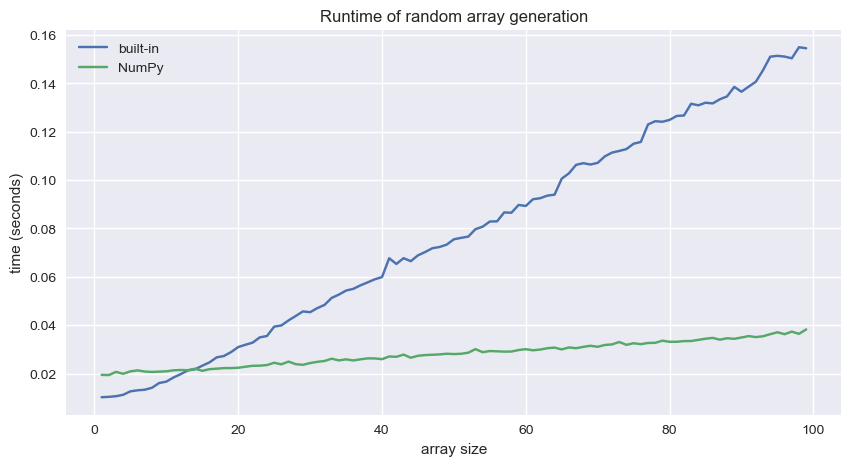

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context("seaborn-v0_8"):
  plt.figure(figsize=(10, 5))
  plt.plot(sizes, runtime_builtin, label="built-in")
  plt.plot(sizes, runtime_numpy, label="NumPy")
  plt.xlabel("array size")
  plt.ylabel("time (seconds)")
  plt.title("Runtime of random array generation")
  plt.legend()
  plt.show()